## ANALYSIS OF TWEETS USING SENTIMENT ANALYSIS (Notebook-2)

### STEP.1: Importing necessary libraries to perform the analysis

In [1]:
#using import all the libraries are imported
import pandas as pd
import numpy as np
import random
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

> **Importing Tweets by uploading the csv file**

In [2]:
# Import Rockstar Games Tweeter Data as csv

data = pd.read_csv("Rstar_1.csv", header = None)

In [3]:
# Check the uploaded file

data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,9.840000e+17,ImmaFrogga.eth 👽,xFrogga,False,Imma. Come. In. Peace.\r\n\r\n@ImmaDegen - Pio...,Planet Earth,543.0,1547.0,7.0,1469.0,815.0,2022-05-04 01:48:35+00:00,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,0.0,[],Twitter Web App,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.290000e+18,creator,TopPopsShop1,False,i create things WITH me / myself / i / u / we ...,"Blue Ash, OH",762.0,5006.0,1.0,12797.0,18732.0,2022-05-04 01:47:42+00:00,"RT @GTASeries: 18 years ago today, #RockstarGa...",22.0,"[{'text': 'RockstarGames', 'indices': [35, 49]}]",Twitter for iPhone,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.100000e+18,‎Lock,Lockvix,False,Just a bloke who loves gaming,Australia,45.0,510.0,0.0,8623.0,1424.0,2022-05-04 01:47:07+00:00,RT @Patrick21611: @RockstarGames It looks like...,22.0,[],Twitter for iPhone,0.0


### Step.2: Cleaning the data for Analysis

> Dropping the null cells

In [4]:
#dropping the null cells
data.dropna(inplace=True)

Adding column headlines to the data

In [5]:
# Add Feature Headline

data.columns = ['id','name','screen_name','verified','description','location','followers_count','friends_count','listed_count',
                'favourites_count', 'statuses_count','created_at','Text','retweet_count',
                'hashtags','source','favorite_count']
# Show dataset
data.head(5)

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,Text,retweet_count,hashtags,source,favorite_count
0,9.840000e+17,ImmaFrogga.eth 👽,xFrogga,False,Imma. Come. In. Peace.\r\n\r\n@ImmaDegen - Pio...,Planet Earth,543.0,1547.0,7.0,1469.0,815.0,2022-05-04 01:48:35+00:00,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,0.0,[],Twitter Web App,0.0
2,1.290000e+18,creator,TopPopsShop1,False,i create things WITH me / myself / i / u / we ...,"Blue Ash, OH",762.0,5006.0,1.0,12797.0,18732.0,2022-05-04 01:47:42+00:00,"RT @GTASeries: 18 years ago today, #RockstarGa...",22.0,"[{'text': 'RockstarGames', 'indices': [35, 49]}]",Twitter for iPhone,0.0
4,1.100000e+18,‎Lock,Lockvix,False,Just a bloke who loves gaming,Australia,45.0,510.0,0.0,8623.0,1424.0,2022-05-04 01:47:07+00:00,RT @Patrick21611: @RockstarGames It looks like...,22.0,[],Twitter for iPhone,0.0
6,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,1794.0,2022-05-04 01:46:44+00:00,@ProdigyXSpectre @RockstarGames The adder is 1...,0.0,[],Twitter for Android,0.0
10,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,1794.0,2022-05-04 01:45:38+00:00,@RockstarGames A 700k car from the 360 Era of ...,0.0,[],Twitter for Android,0.0


In [6]:
# drop duplicate by a column name
 
data.drop_duplicates(['Text'], keep='last', inplace=True)

In [7]:
#checking the number of datapoints
print('Numer of Datapoint {0:} & Number of Features {1:} '.format(data.shape[0], data.shape[1]))

Numer of Datapoint 2230 & Number of Features 17 


In [8]:
# checking for missing value
data.isnull().sum()

id                  0
name                0
screen_name         0
verified            0
description         0
location            0
followers_count     0
friends_count       0
listed_count        0
favourites_count    0
statuses_count      0
created_at          0
Text                0
retweet_count       0
hashtags            0
source              0
favorite_count      0
dtype: int64

> **Removing url from the dataset**

In [9]:
# creating function to remove url
def url_rmv(data):
    temp = []
    for i in data:
      #print(f"Data = {i} \n\n")
      a=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", i)
      temp.append(a)
    return temp

In [10]:
# Implementing the function
url_rmvd_text = url_rmv(data["Text"])
url_rmvd_text

['@yofibonaccy @ImmaDegen @SomniumSpace @RockstarGames @VRChat for real, i can bang it against ppl and they still wont get it',
 '@ProdigyXSpectre @RockstarGames The adder is 1 mil tho 😂😂😂',
 '@RockstarGames A 700k car from the 360 Era of gta? Wowie, super duper exciting...',
 '@RockstarGames you could at least make GTA V online cross play until yall drop GTA6',
 'As much as I wanna #SaveRedDeadOnline. @RockstarGames doesn’t. \r\n\r\nAnd there’s nothing we can do to change someone’s…  ',
 '@xFrogga @ImmaDegen @SomniumSpace @RockstarGames @VRChat Most slept on project in the world.',
 '@Itsjstdubz @DanielCorleon15 @videotech_ @RockstarGames I Guess they Betrayed the Different Type of Genre of Music…  ',
 "RT @DhaynielKurt: @RockstarGames Another Cancer Ass Monthly Event Week That is Most Likely You are Killing the RDO Community's Hardest to S…",
 'RT @mburcal: @G4Gamor @screenrant @RockstarGames I am not letting it go till either @RockstarGames respects its players or no longer exists…'

In [11]:
data["url_rmvd_text"]= url_rmvd_text

In [12]:
data.head()

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,Text,retweet_count,hashtags,source,favorite_count,url_rmvd_text
0,9.840000e+17,ImmaFrogga.eth 👽,xFrogga,False,Imma. Come. In. Peace.\r\n\r\n@ImmaDegen - Pio...,Planet Earth,543.0,1547.0,7.0,1469.0,815.0,2022-05-04 01:48:35+00:00,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,0.0,[],Twitter Web App,0.0,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...
6,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,1794.0,2022-05-04 01:46:44+00:00,@ProdigyXSpectre @RockstarGames The adder is 1...,0.0,[],Twitter for Android,0.0,@ProdigyXSpectre @RockstarGames The adder is 1...
10,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,1794.0,2022-05-04 01:45:38+00:00,@RockstarGames A 700k car from the 360 Era of ...,0.0,[],Twitter for Android,0.0,@RockstarGames A 700k car from the 360 Era of ...
12,1.140000e+18,Stanley Yelnats,Seauxfee,False,555✨222 ✨444 ✨ 111✨333,Beauxsur City,107.0,231.0,0.0,2362.0,1979.0,2022-05-04 01:45:29+00:00,@RockstarGames you could at least make GTA V o...,0.0,[],Twitter for Android,0.0,@RockstarGames you could at least make GTA V o...
14,8.670000e+17,Tuck Frump,BidenShotMyLeg,False,Switch those first two letters and we got ours...,"Bronx, NY",437.0,459.0,0.0,27286.0,10942.0,2022-05-04 01:44:10+00:00,As much as I wanna #SaveRedDeadOnline. @Rockst...,0.0,"[{'text': 'SaveRedDeadOnline', 'indices': [19,...",Twitter for iPhone,0.0,As much as I wanna #SaveRedDeadOnline. @Rockst...


> Loading the Stopwords

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
sw=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smsaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

> Creating a new list of stopwords without "no", "nor" and "not"

In [15]:
neg_sw=["no","nor","not"]

In [16]:
pos_sw = [i for i in sw if i not in neg_sw]

In [17]:
pos_sw    #finalized list of positive stopwords

['what',
 'any',
 'why',
 'have',
 've',
 "wasn't",
 'ourselves',
 'above',
 'll',
 'yourselves',
 "haven't",
 'further',
 'the',
 'few',
 'in',
 'shouldn',
 "shouldn't",
 'about',
 'they',
 'our',
 'when',
 'don',
 'she',
 'on',
 'd',
 'out',
 'their',
 'off',
 'other',
 'mightn',
 'at',
 'herself',
 'isn',
 'by',
 'then',
 "you've",
 'through',
 'he',
 'down',
 'do',
 'and',
 'while',
 "mightn't",
 'too',
 "isn't",
 'your',
 'such',
 'can',
 'has',
 'during',
 'myself',
 'most',
 'weren',
 'ain',
 'mustn',
 'is',
 'ma',
 'that',
 "you're",
 'needn',
 'there',
 'will',
 't',
 'very',
 'are',
 'aren',
 'these',
 'just',
 'an',
 'after',
 "doesn't",
 'so',
 'didn',
 'being',
 "needn't",
 'from',
 'more',
 'does',
 "didn't",
 "weren't",
 'you',
 'between',
 'both',
 'hasn',
 'theirs',
 "mustn't",
 "it's",
 'i',
 'where',
 'doesn',
 'here',
 'because',
 'his',
 'himself',
 'who',
 'themselves',
 'wasn',
 "wouldn't",
 'whom',
 'be',
 'which',
 'some',
 'been',
 'him',
 "hasn't",
 'those',


> Loading the Punctuations

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

> **Stemming is performed**

In [19]:
from nltk.stem import PorterStemmer

ps=PorterStemmer()

> **Tokenization**

In [20]:
from nltk import word_tokenize

In [21]:
#creating a function for cleaning the text further
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    L=[]
    for i in text:
        if i.isalnum():
            L.append(i)
    
    text=L[:]          #copying list
    L.clear()
    
    for i in text:
        if i not in pos_sw and i not in string.punctuation:
            L.append(i)
    
    text=L[:]
    L.clear()
    
    for i in text:
        L.append(ps.stem(i))
    
    
    return " ".join(L)

In [22]:
import nltk
nltk.download('punkt')
# Checking the performance of the Function
transform_text("i, am not! sohini, http: www.policybazzar.com")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smsaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'not sohini http'

In [23]:
#Applying the function to the url_rmvd_text
data["Clean_text"]=data["url_rmvd_text"].apply(transform_text)

In [24]:
#Creating function to remove retweets
def cleanTxt(text):
    text = re.sub(r'rt[\s]+', '', text) # Remove Retweet
    
    return text
# Cleaning the text
data['Clean_text'] = data['Clean_text'].apply(cleanTxt)

In [25]:
data.head(10)

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,Text,retweet_count,hashtags,source,favorite_count,url_rmvd_text,Clean_text
0,9.840000e+17,ImmaFrogga.eth 👽,xFrogga,False,Imma. Come. In. Peace.\r\n\r\n@ImmaDegen - Pio...,Planet Earth,543.0,1547.0,7.0,1469.0,815.0,2022-05-04 01:48:35+00:00,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,0.0,[],Twitter Web App,0.0,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,yofibonacci immadegen somniumspac rockstargam ...
6,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,1794.0,2022-05-04 01:46:44+00:00,@ProdigyXSpectre @RockstarGames The adder is 1...,0.0,[],Twitter for Android,0.0,@ProdigyXSpectre @RockstarGames The adder is 1...,prodigyxspectr rockstargam adder 1 mil tho
10,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,1794.0,2022-05-04 01:45:38+00:00,@RockstarGames A 700k car from the 360 Era of ...,0.0,[],Twitter for Android,0.0,@RockstarGames A 700k car from the 360 Era of ...,rockstargam 700k car 360 era gta wowi super du...
12,1.140000e+18,Stanley Yelnats,Seauxfee,False,555✨222 ✨444 ✨ 111✨333,Beauxsur City,107.0,231.0,0.0,2362.0,1979.0,2022-05-04 01:45:29+00:00,@RockstarGames you could at least make GTA V o...,0.0,[],Twitter for Android,0.0,@RockstarGames you could at least make GTA V o...,rockstargam could least make gta v onlin cross...
14,8.670000e+17,Tuck Frump,BidenShotMyLeg,False,Switch those first two letters and we got ours...,"Bronx, NY",437.0,459.0,0.0,27286.0,10942.0,2022-05-04 01:44:10+00:00,As much as I wanna #SaveRedDeadOnline. @Rockst...,0.0,"[{'text': 'SaveRedDeadOnline', 'indices': [19,...",Twitter for iPhone,0.0,As much as I wanna #SaveRedDeadOnline. @Rockst...,much wan na savereddeadonlin rockstargam noth ...
18,1.460000e+18,fibonaccy.rsk,yofibonaccy,False,🥞,Metaverse,207.0,843.0,6.0,1803.0,2951.0,2022-05-04 01:42:21+00:00,@xFrogga @ImmaDegen @SomniumSpace @RockstarGam...,0.0,[],Twitter for iPhone,0.0,@xFrogga @ImmaDegen @SomniumSpace @RockstarGam...,xfrogga immadegen somniumspac rockstargam vrch...
22,1.320000e+18,Average Narrator,DhaynielKurt,False,"Knowledge About: Video Games, Firearms & Roast...","Sta Elena, Rizal",93.0,1255.0,0.0,9853.0,1424.0,2022-05-04 01:40:43+00:00,@Itsjstdubz @DanielCorleon15 @videotech_ @Rock...,0.0,[],Twitter Web App,2.0,@Itsjstdubz @DanielCorleon15 @videotech_ @Rock...,itsjstdubz danielcorleon15 rockstargam guess b...
44,7.890000e+17,Om3gARED66,Om3gARED66,False,#SaveRedDeadOnline | 19 | He/Him | Arcane love...,"Phoenix, AZ",290.0,577.0,2.0,11859.0,7372.0,2022-05-04 01:39:11+00:00,RT @DhaynielKurt: @RockstarGames Another Cance...,1.0,[],Twitter for Android,0.0,RT @DhaynielKurt: @RockstarGames Another Cance...,dhaynielkurockstargam anoth cancer ass monthli...
58,7.890000e+17,Om3gARED66,Om3gARED66,False,#SaveRedDeadOnline | 19 | He/Him | Arcane love...,"Phoenix, AZ",290.0,577.0,2.0,11859.0,7372.0,2022-05-04 01:38:12+00:00,RT @mburcal: @G4Gamor @screenrant @RockstarGam...,1.0,[],Twitter for Android,0.0,RT @mburcal: @G4Gamor @screenrant @RockstarGam...,mburcal g4gamor screenrant rockstargam not let...
68,9.960000e+17,Mr. Sunny,MrSunnyDEV,False,“Greatness.. Comes with a Price..”,United States,127.0,693.0,1.0,7788.0,6962.0,2022-05-04 01:33:00+00:00,@RockstarGames Your a joke.,0.0,[],Twitter for iPhone,0.0,@RockstarGames Your a joke.,rockstargam joke


In [26]:
#Analyzing the frequency of words after cleaning
data["num_words_Clean_text"]=data["Clean_text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
data

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,Text,retweet_count,hashtags,source,favorite_count,url_rmvd_text,Clean_text,num_words_Clean_text
0,9.840000e+17,ImmaFrogga.eth 👽,xFrogga,False,Imma. Come. In. Peace.\r\n\r\n@ImmaDegen - Pio...,Planet Earth,543.0,1547.0,7.0,1469.0,815.0,2022-05-04 01:48:35+00:00,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,0.0,[],Twitter Web App,0.0,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,yofibonacci immadegen somniumspac rockstargam ...,11
6,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,1794.0,2022-05-04 01:46:44+00:00,@ProdigyXSpectre @RockstarGames The adder is 1...,0.0,[],Twitter for Android,0.0,@ProdigyXSpectre @RockstarGames The adder is 1...,prodigyxspectr rockstargam adder 1 mil tho,6
10,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,1794.0,2022-05-04 01:45:38+00:00,@RockstarGames A 700k car from the 360 Era of ...,0.0,[],Twitter for Android,0.0,@RockstarGames A 700k car from the 360 Era of ...,rockstargam 700k car 360 era gta wowi super du...,10
12,1.140000e+18,Stanley Yelnats,Seauxfee,False,555✨222 ✨444 ✨ 111✨333,Beauxsur City,107.0,231.0,0.0,2362.0,1979.0,2022-05-04 01:45:29+00:00,@RockstarGames you could at least make GTA V o...,0.0,[],Twitter for Android,0.0,@RockstarGames you could at least make GTA V o...,rockstargam could least make gta v onlin cross...,12
14,8.670000e+17,Tuck Frump,BidenShotMyLeg,False,Switch those first two letters and we got ours...,"Bronx, NY",437.0,459.0,0.0,27286.0,10942.0,2022-05-04 01:44:10+00:00,As much as I wanna #SaveRedDeadOnline. @Rockst...,0.0,"[{'text': 'SaveRedDeadOnline', 'indices': [19,...",Twitter for iPhone,0.0,As much as I wanna #SaveRedDeadOnline. @Rockst...,much wan na savereddeadonlin rockstargam noth ...,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16032,1.655198e+09,รuperรเzed ΩMEGA,BgBardasMegaRod,False,"""Funny how we were raised not to be peer press...",Fourth World Apokolips,1293.0,1419.0,8.0,210246.0,213389.0,2022-05-05 00:24:57+00:00,RT @SirMurDa_: Neon City\r\n\r\n#SecretShadowz...,53.0,"[{'text': 'SecretShadowz', 'indices': [26, 40]...",Twitter Web App,0.0,RT @SirMurDa_: Neon City\r\n\r\n#SecretShadowz...,neon citi secretshadowz gtaonlin rockstargam ps5,6
16036,1.246331e+08,ryota kawai,toypuhoo,False,ワンコとニャンコと、音楽でみんなを楽しませてくれる人が大好きなただの人です。 すみません、Ｄ...,愛知県と政令指定都市,5659.0,5750.0,0.0,112853.0,99484.0,2022-05-05 00:24:39+00:00,"RT @jhainley1: 💔My heart has heard you say,🥀\r...",4587.0,[],Twitter for iPhone,0.0,"RT @jhainley1: 💔My heart has heard you say,🥀\r...",jhainley1 heaheard say come talk hearespond lord,7
16038,1.246331e+08,ryota kawai,toypuhoo,False,ワンコとニャンコと、音楽でみんなを楽しませてくれる人が大好きなただの人です。 すみません、Ｄ...,愛知県と政令指定都市,5659.0,5750.0,0.0,112853.0,99484.0,2022-05-05 00:24:36+00:00,RT @jhainley1: 🎬 🥀“Make me feel love”🖤\r\n\r\n...,3572.0,[],Twitter for iPhone,0.0,RT @jhainley1: 🎬 🥀“Make me feel love”🖤\r\n\r\n...,jhainley1 make feel love youtub twist psyki ma...,9
16050,1.450000e+18,ATOM,Virtual_Optix,False,Virtual Photography - Xbox Series X https://t...,"Ontario, CA",268.0,125.0,0.0,28160.0,1834.0,2022-05-05 00:22:23+00:00,Beast Within \r\n\r\nVertical pic- tap to expa...,8.0,"[{'text': 'GTAOnline', 'indices': [45, 55]}, {...",Twitter for iPhone,45.0,Beast Within \r\n\r\nVertical pic- tap to expa...,beast within vertic tap expand gtaonlin rockst...,7


In [28]:
#Calculating the mean of Clean text
data["num_words_Clean_text"].mean()

7.7596412556053815

In [29]:
data["num_words_orignal_Text"]=data["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
#Calculating the mean of original text
data["num_words_orignal_Text"].mean()

18.89596412556054

> **Based on the mean values, it can be stated that cleaning is successfully executed as mean before cleaning is 18.89 and after cleaning is 7.75**

### Creating word clouds for Positive, Negative and Neutral Tweets

> **Subjectivity & Polarity**

In [31]:
# Create a function to get the subjectivity 

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creat two new columns
data['Subjectivity'] = data['Clean_text'].apply(getSubjectivity)
data['Polarity'] = data['Clean_text'].apply(getPolarity)

# Show the new dataframe with the new columns

data.head(10)

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,...,retweet_count,hashtags,source,favorite_count,url_rmvd_text,Clean_text,num_words_Clean_text,num_words_orignal_Text,Subjectivity,Polarity
0,9.840000e+17,ImmaFrogga.eth 👽,xFrogga,False,Imma. Come. In. Peace.\r\n\r\n@ImmaDegen - Pio...,Planet Earth,543.0,1547.0,7.0,1469.0,...,0.0,[],Twitter Web App,0.0,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,yofibonacci immadegen somniumspac rockstargam ...,11,25,0.300000,0.200000
6,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,...,0.0,[],Twitter for Android,0.0,@ProdigyXSpectre @RockstarGames The adder is 1...,prodigyxspectr rockstargam adder 1 mil tho,6,11,0.000000,0.000000
10,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,...,0.0,[],Twitter for Android,0.0,@RockstarGames A 700k car from the 360 Era of ...,rockstargam 700k car 360 era gta wowi super du...,10,18,0.666667,0.333333
12,1.140000e+18,Stanley Yelnats,Seauxfee,False,555✨222 ✨444 ✨ 111✨333,Beauxsur City,107.0,231.0,0.0,2362.0,...,0.0,[],Twitter for Android,0.0,@RockstarGames you could at least make GTA V o...,rockstargam could least make gta v onlin cross...,12,16,0.200000,-0.150000
14,8.670000e+17,Tuck Frump,BidenShotMyLeg,False,Switch those first two letters and we got ours...,"Bronx, NY",437.0,459.0,0.0,27286.0,...,0.0,"[{'text': 'SaveRedDeadOnline', 'indices': [19,...",Twitter for iPhone,0.0,As much as I wanna #SaveRedDeadOnline. @Rockst...,much wan na savereddeadonlin rockstargam noth ...,8,31,0.150000,-0.200000
18,1.460000e+18,fibonaccy.rsk,yofibonaccy,False,🥞,Metaverse,207.0,843.0,6.0,1803.0,...,0.0,[],Twitter for iPhone,0.0,@xFrogga @ImmaDegen @SomniumSpace @RockstarGam...,xfrogga immadegen somniumspac rockstargam vrch...,8,18,0.000000,0.000000
22,1.320000e+18,Average Narrator,DhaynielKurt,False,"Knowledge About: Video Games, Firearms & Roast...","Sta Elena, Rizal",93.0,1255.0,0.0,9853.0,...,0.0,[],Twitter Web App,2.0,@Itsjstdubz @DanielCorleon15 @videotech_ @Rock...,itsjstdubz danielcorleon15 rockstargam guess b...,8,22,0.000000,0.000000
44,7.890000e+17,Om3gARED66,Om3gARED66,False,#SaveRedDeadOnline | 19 | He/Him | Arcane love...,"Phoenix, AZ",290.0,577.0,2.0,11859.0,...,1.0,[],Twitter for Android,0.0,RT @DhaynielKurt: @RockstarGames Another Cance...,dhaynielkurockstargam anoth cancer ass monthli...,12,26,0.000000,0.000000
58,7.890000e+17,Om3gARED66,Om3gARED66,False,#SaveRedDeadOnline | 19 | He/Him | Arcane love...,"Phoenix, AZ",290.0,577.0,2.0,11859.0,...,1.0,[],Twitter for Android,0.0,RT @mburcal: @G4Gamor @screenrant @RockstarGam...,mburcal g4gamor screenrant rockstargam not let...,14,27,0.000000,0.000000
68,9.960000e+17,Mr. Sunny,MrSunnyDEV,False,“Greatness.. Comes with a Price..”,United States,127.0,693.0,1.0,7788.0,...,0.0,[],Twitter for iPhone,0.0,@RockstarGames Your a joke.,rockstargam joke,2,6,0.000000,0.000000


In [32]:
# Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

data['Sentiment'] = data['Polarity'].apply(getAnalysis)

# Show the dataframe
data

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,...,hashtags,source,favorite_count,url_rmvd_text,Clean_text,num_words_Clean_text,num_words_orignal_Text,Subjectivity,Polarity,Sentiment
0,9.840000e+17,ImmaFrogga.eth 👽,xFrogga,False,Imma. Come. In. Peace.\r\n\r\n@ImmaDegen - Pio...,Planet Earth,543.0,1547.0,7.0,1469.0,...,[],Twitter Web App,0.0,@yofibonaccy @ImmaDegen @SomniumSpace @Rocksta...,yofibonacci immadegen somniumspac rockstargam ...,11,25,0.300000,0.200000,Positive
6,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,...,[],Twitter for Android,0.0,@ProdigyXSpectre @RockstarGames The adder is 1...,prodigyxspectr rockstargam adder 1 mil tho,6,11,0.000000,0.000000,Neutral
10,1.330000e+18,𝑀𝑢𝑟𝑎,MorbidMura,False,Fatal Persistence -Your weak feelings do not e...,"Kyoto, Japan",13.0,83.0,1.0,2109.0,...,[],Twitter for Android,0.0,@RockstarGames A 700k car from the 360 Era of ...,rockstargam 700k car 360 era gta wowi super du...,10,18,0.666667,0.333333,Positive
12,1.140000e+18,Stanley Yelnats,Seauxfee,False,555✨222 ✨444 ✨ 111✨333,Beauxsur City,107.0,231.0,0.0,2362.0,...,[],Twitter for Android,0.0,@RockstarGames you could at least make GTA V o...,rockstargam could least make gta v onlin cross...,12,16,0.200000,-0.150000,Negative
14,8.670000e+17,Tuck Frump,BidenShotMyLeg,False,Switch those first two letters and we got ours...,"Bronx, NY",437.0,459.0,0.0,27286.0,...,"[{'text': 'SaveRedDeadOnline', 'indices': [19,...",Twitter for iPhone,0.0,As much as I wanna #SaveRedDeadOnline. @Rockst...,much wan na savereddeadonlin rockstargam noth ...,8,31,0.150000,-0.200000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16032,1.655198e+09,รuperรเzed ΩMEGA,BgBardasMegaRod,False,"""Funny how we were raised not to be peer press...",Fourth World Apokolips,1293.0,1419.0,8.0,210246.0,...,"[{'text': 'SecretShadowz', 'indices': [26, 40]...",Twitter Web App,0.0,RT @SirMurDa_: Neon City\r\n\r\n#SecretShadowz...,neon citi secretshadowz gtaonlin rockstargam ps5,6,20,0.000000,0.000000,Neutral
16036,1.246331e+08,ryota kawai,toypuhoo,False,ワンコとニャンコと、音楽でみんなを楽しませてくれる人が大好きなただの人です。 すみません、Ｄ...,愛知県と政令指定都市,5659.0,5750.0,0.0,112853.0,...,[],Twitter for iPhone,0.0,"RT @jhainley1: 💔My heart has heard you say,🥀\r...",jhainley1 heaheard say come talk hearespond lord,7,31,0.000000,0.000000,Neutral
16038,1.246331e+08,ryota kawai,toypuhoo,False,ワンコとニャンコと、音楽でみんなを楽しませてくれる人が大好きなただの人です。 すみません、Ｄ...,愛知県と政令指定都市,5659.0,5750.0,0.0,112853.0,...,[],Twitter for iPhone,0.0,RT @jhainley1: 🎬 🥀“Make me feel love”🖤\r\n\r\n...,jhainley1 make feel love youtub twist psyki ma...,9,31,0.600000,0.500000,Positive
16050,1.450000e+18,ATOM,Virtual_Optix,False,Virtual Photography - Xbox Series X https://t...,"Ontario, CA",268.0,125.0,0.0,28160.0,...,"[{'text': 'GTAOnline', 'indices': [45, 55]}, {...",Twitter for iPhone,45.0,Beast Within \r\n\r\nVertical pic- tap to expa...,beast within vertic tap expand gtaonlin rockst...,7,14,0.000000,0.000000,Neutral


> **Creating Word Cloud for Positive Sentiments**

In [33]:
ptweets=data[data.Sentiment=='Positive']
ptweets=ptweets.sort_values(['Polarity'],ascending=False)

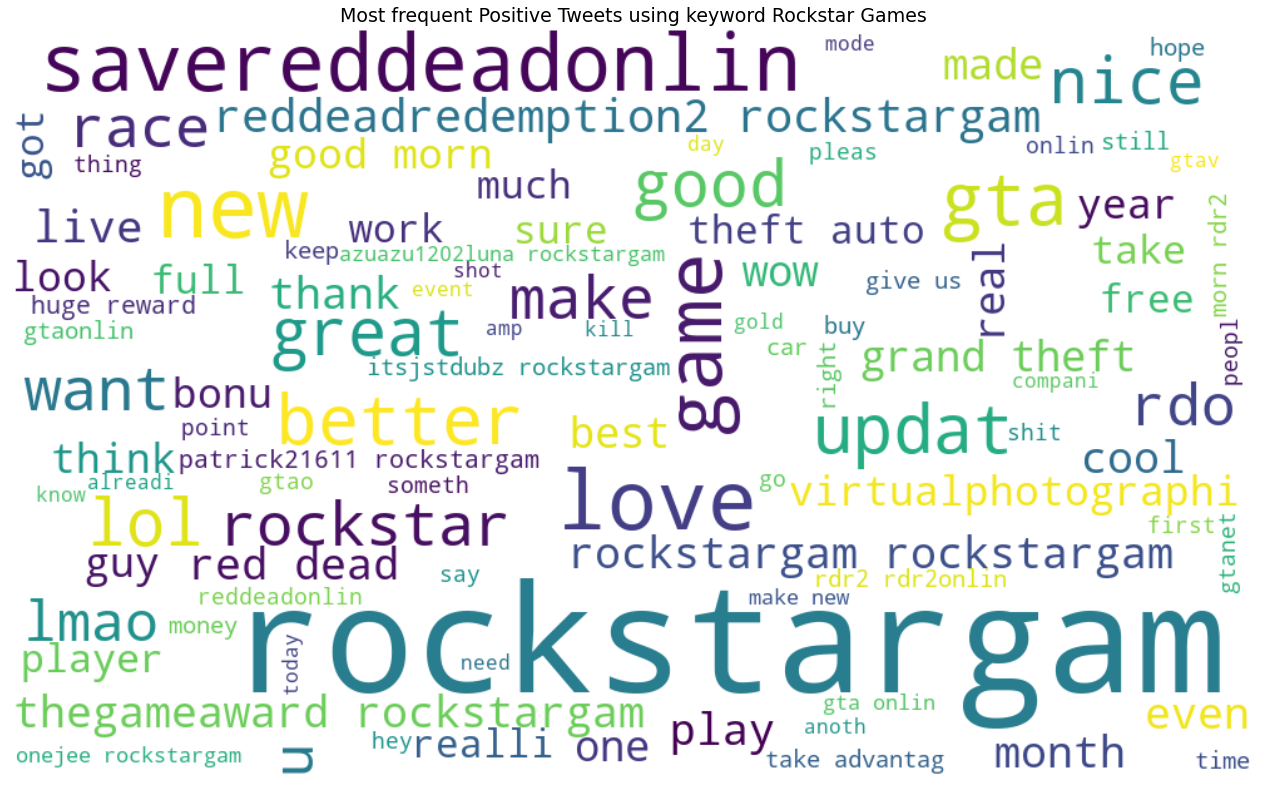

In [34]:
# Plot Word Cloud
plt.style.use('fivethirtyeight')

allWords = ' '.join([twts for twts in ptweets['Clean_text']])
plt.figure(figsize=(20,15), facecolor='None')

wordCloud = WordCloud(max_words=100, width= 1000, height= 600, random_state= 21, max_font_size= 120, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Most frequent Positive Tweets using keyword Rockstar Games', fontsize=19)
plt.axis('off')
plt.show()

In [35]:
# percentage of positive tweets
round( (ptweets.shape[0] / data.shape[0]) * 100 , 1)

22.5

In [36]:
tweet_corpus_positive=[]         
for msg in ptweets[(ptweets["Sentiment"]=="Positive")]["Clean_text"].tolist():
    for word in msg.split():
        tweet_corpus_positive.append(word)

In [37]:
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_positive).most_common(20),columns=["Words","Count"])

,Words,Count
0,rockstargam,433
1,new,59
2,gta,43
3,love,39
4,savereddeadonlin,36
5,good,35
6,game,34
7,play,32
8,race,29
9,make,28


> **Graphical presentation of the positive words with frequency**

C:\Users\smsaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


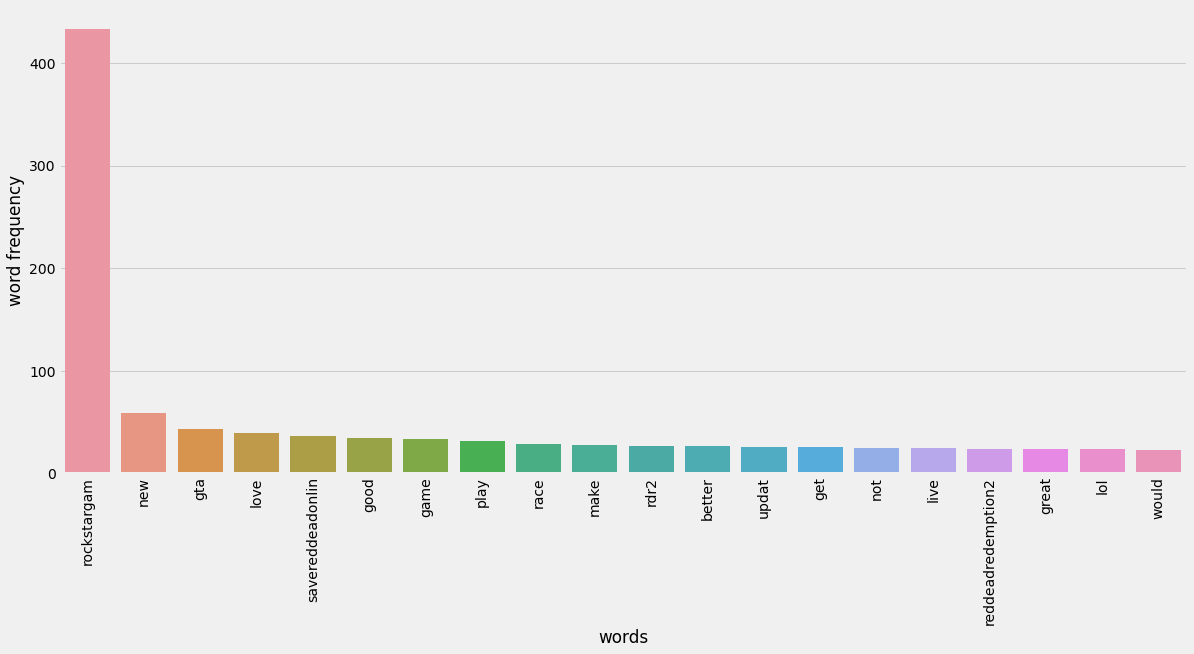

In [38]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_positive).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_positive).most_common(20))[1])
plt.xlabel("words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.show()

> **Creating wordcloud for Negative Sentiments**

In [39]:
negtweets=data[data.Sentiment=='Negative']
negtweets=negtweets.sort_values(['Polarity'],ascending=False)

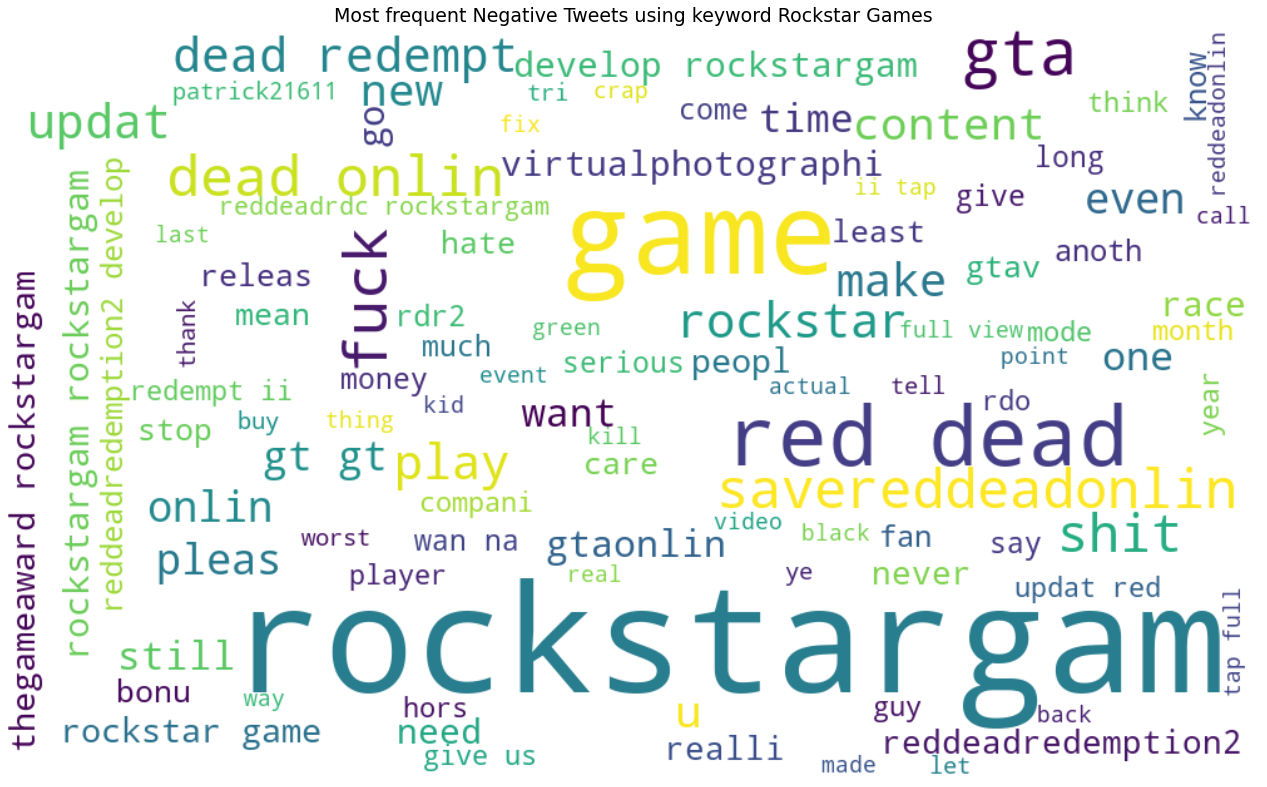

In [40]:
# Plot Word Cloud
plt.style.use('fivethirtyeight')

allWords = ' '.join([twts for twts in negtweets['Clean_text']])
plt.figure(figsize=(20,15), facecolor='None')

wordCloud = WordCloud(max_words=100, width= 1000, height= 600, random_state= 21, max_font_size= 120, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Most frequent Negative Tweets using keyword Rockstar Games', fontsize=19)
plt.axis('off')
plt.show()

In [41]:
# percentage of negative tweets
round( (negtweets.shape[0] / data.shape[0]) * 100 , 1)

21.9

In [42]:
tweet_corpus_negative=[]         
for msg in negtweets[(negtweets["Sentiment"]=="Negative")]["Clean_text"].tolist():
    for word in msg.split():
        tweet_corpus_negative.append(word)

In [43]:
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_negative).most_common(20),columns=["Words","Count"])

,Words,Count
0,rockstargam,442
1,game,213
2,dead,114
3,red,91
4,onlin,57
5,gta,54
6,rockstar,41
7,fuck,41
8,updat,35
9,savereddeadonlin,34


> **Graphical presentation of the negative words with frequency**

C:\Users\smsaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


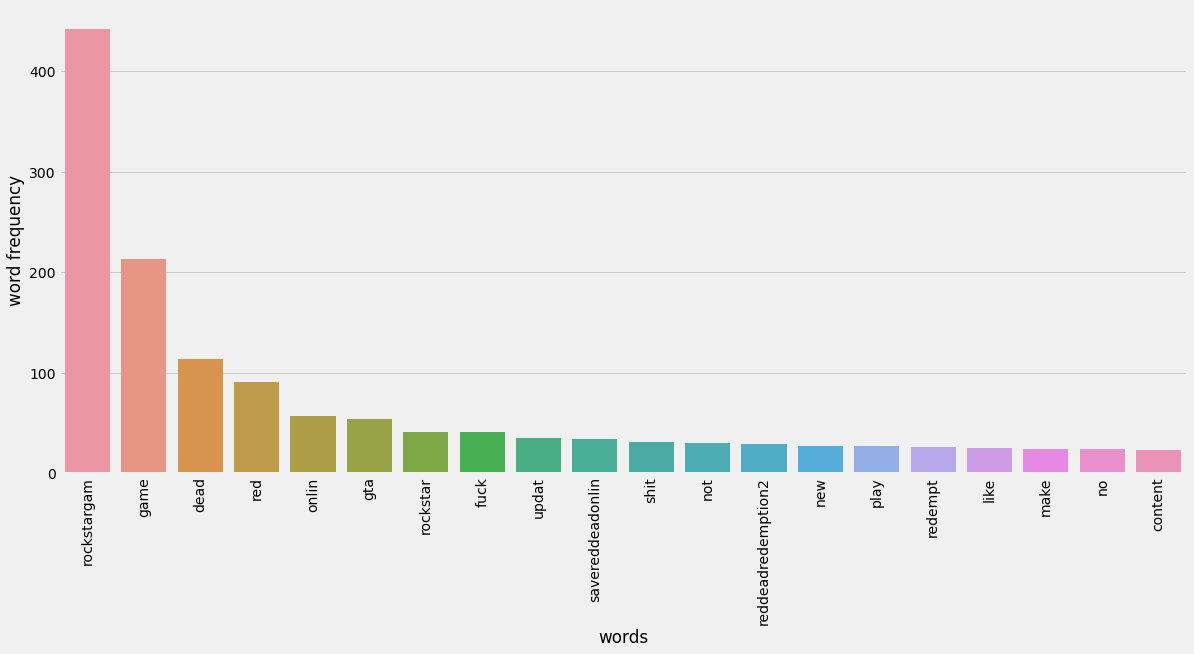

In [44]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_negative).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_negative).most_common(20))[1])
plt.xlabel("words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.show()

> **Creating wordcloud for Neutral Sentiments**

In [45]:
# Get the percentage of Neutral tweets
neu_tweets = data[data.Sentiment == 'Neutral']
neutweets = neu_tweets['Clean_text']

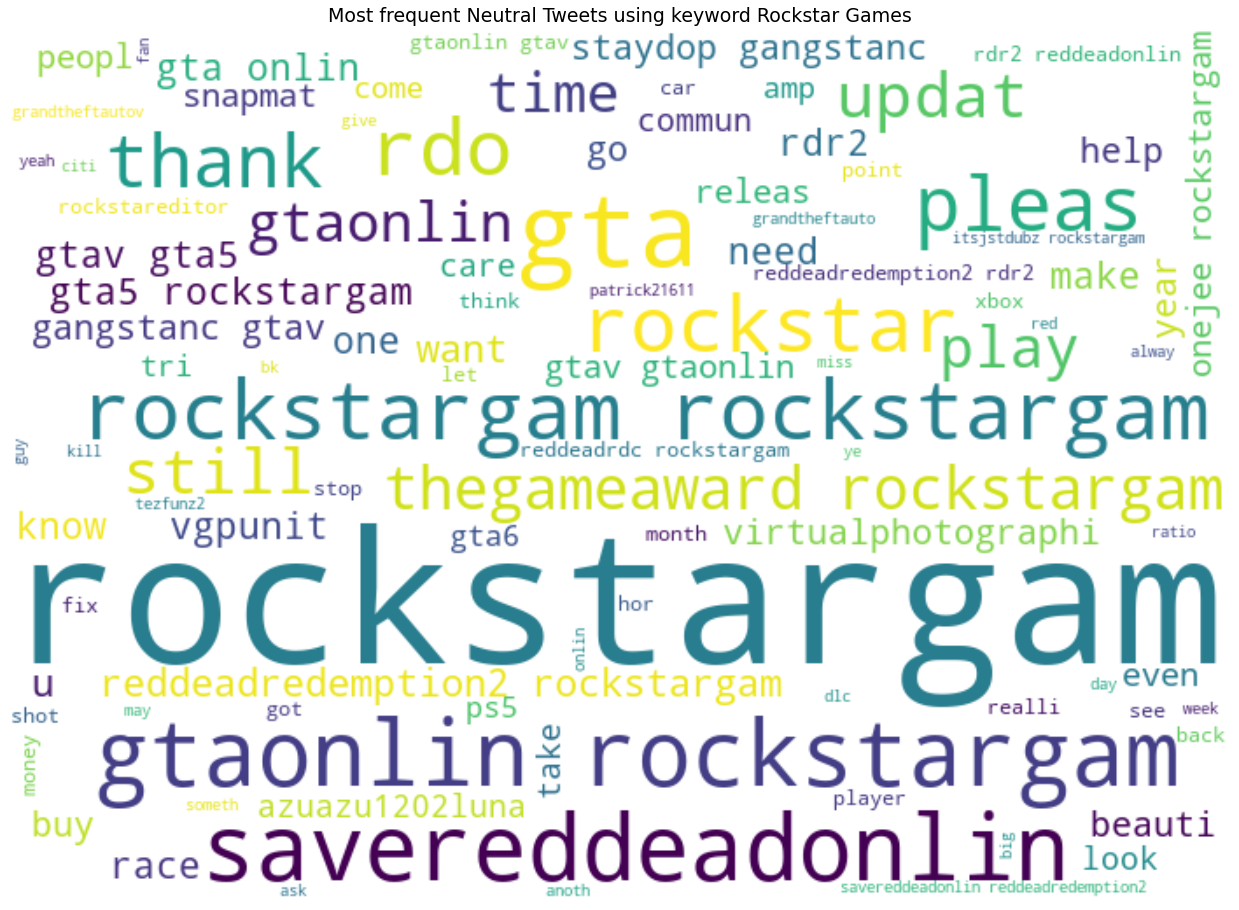

In [46]:
# Plot Word Cloud
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15), facecolor='None')

allWords = ' '.join([twts for twts in neu_tweets['Clean_text']])
wordCloud = WordCloud(max_words=100,width= 700, height= 500, random_state= 21, max_font_size= 120, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Most frequent Neutral Tweets using keyword Rockstar Games', fontsize=19)
plt.axis('off')
plt.show()

In [47]:
# percentage of neutral tweets
round( (neutweets.shape[0] / data.shape[0]) * 100 , 1)

55.6

> **Showing the distribution of Positive, Negative and Neutral using Pie and Bar Charts**

In [48]:
# Tweets distribution
data=pd.DataFrame(data)
ptweets=pd.DataFrame(ptweets)
negtweets=pd.DataFrame(negtweets)
neutweets=pd.DataFrame(neutweets)
print("total tweets: ",len(data))
print("total positive tweets: ",len(ptweets))
print("total negative tweets: ",len(negtweets))
print("total neutral tweets: ",len(neutweets))

total tweets:  2230
total positive tweets:  502
total negative tweets:  489
total neutral tweets:  1239


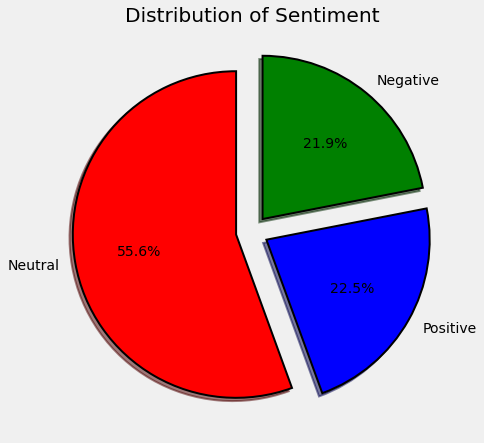

In [49]:
# Pie Chart to explain ratio the public sentiment
from seaborn import colors


fig = plt.figure(figsize=(7,7))
colors = ('red','blue','green')
wp = {'linewidth':2,'edgecolor':'black'}
tags = data['Sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%', shadow= True, colors = colors,
startangle=90, wedgeprops= wp, explode= explode, label= '')
plt.title('Distribution of Sentiment')

plt.show()

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

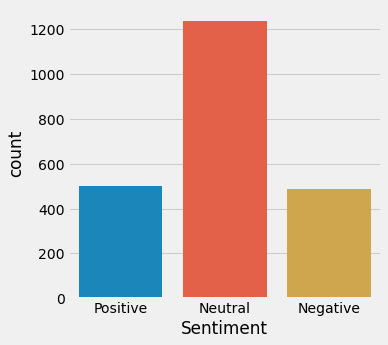

In [50]:
# Sentiment count in Bar-chart
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment', data = data)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2)).fit(data['Text'])

In [52]:
# changing the words into features
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 21972

First 20 features:
 ['000', '000 and', '000 car', '0422_zadoppe', '0422_zadoppe japan', '0pa4todreg', '0pgjouqejv', '0pkrlgnxcs', '0pv9yg6nvl', '0pvbqykqmd', '0rsuozfhv3', '0tyhtwiogr', '0tyhtwiogr via', '0udicnardb', '0whytcxag7', '0xc0000b7', '0xc0000b7 not', '0zxyv2xz7q', '10', '10 10']


In [53]:
# Transformation
X = data['Clean_text']
Y = data['Sentiment']
X = vect.transform(X)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1784, 21972)
Size of y_train: (1784,)
Size of x_test: (446, 21972)
Size of y_test: (446,)


In [56]:
# Removing warnings
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Checking the test accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.87%


In [58]:
# implementing Confusion matrix
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 71  29   5]
 [  1 238   2]
 [  4  22  74]]


              precision    recall  f1-score   support

    Negative       0.93      0.68      0.78       105
     Neutral       0.82      0.99      0.90       241
    Positive       0.91      0.74      0.82       100

    accuracy                           0.86       446
   macro avg       0.89      0.80      0.83       446
weighted avg       0.87      0.86      0.85       446



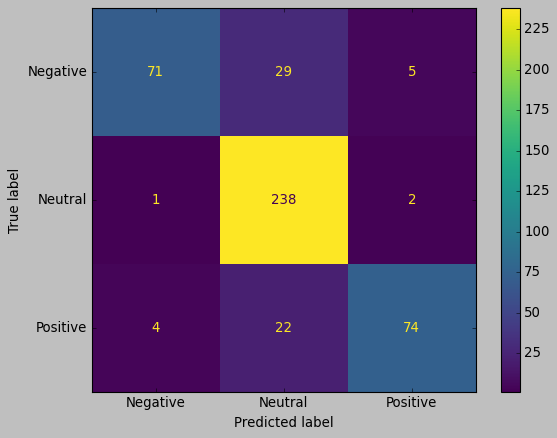

In [59]:
# Confusion Matrix display
from matplotlib import style
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

### Micro-Influencer selection 

In [60]:
# drop duplicate by a column name
 
ptweets.drop_duplicates(['screen_name'], keep='last', inplace=True)

In [61]:
# Top 10 followers_count
Followers= ptweets.nlargest(10, 'followers_count')
Followers

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,...,hashtags,source,favorite_count,url_rmvd_text,Clean_text,num_words_Clean_text,num_words_orignal_Text,Subjectivity,Polarity,Sentiment
4556,2.975845e+07,Rockstar Games,RockstarGames,True,The official home of Rockstar Games on Twitter...,NYC / Edinburgh / Bogota,13436518.0,1497.0,19076.0,8949.0,...,[],Sprinklr,1850.0,Take advantage of huge rewards on Races in Red...,take advantag huge reward race red dead onlin ...,13,27,0.325000,0.050000,Positive
7812,1.477770e+08,Rockstar Support,RockstarSupport,True,Official Rockstar Games technical support on T...,"New York, NY",781162.0,1.0,934.0,0.0,...,[],Sprout Social,0.0,@macca74swe Try clearing the browser cache. Pl...,macca74sw tri clear browser cach pleas refer s...,9,20,0.383333,0.100000,Positive
14398,4.275916e+07,GTANet,GTANet,True,One of the oldest communities dedicated to Gra...,Vice City,70965.0,581.0,206.0,12444.0,...,[],Twitter Web App,15.0,"Thanks to Gridl0k on our @GTAForums, if you're...",thank gridl0k gtaforum look quick n easi playl...,11,29,0.500000,0.333333,Positive
14580,1.010000e+18,Twitch Community,TwitchSIE,False,Use @TwitchSIE \r\nDISCORD: https://t.co/KHfrB...,"Iowa, USA",33098.0,282.0,63.0,1006.0,...,[],TwitchSIE Bot V2,0.0,RT @hshires1: From driving trucks with awful d...,hshires1 drive truck aw demonstr park bit scub...,12,29,0.666667,0.166667,Positive
11298,1.150000e+18,streamachine retweets 🇬🇧,sme_rt,False,Follow & add @sme_rt for retweets\r\n\r\nhttps...,"Manchester, UK",29606.0,8014.0,128.0,1843.0,...,"[{'text': 'MartialLawmen', 'indices': [66, 80]...",SME Support,0.0,RT @martialgamer41: Now live on GTA V Cash mon...,martialgamer41 live gta v cash money thursday ...,11,26,0.500000,0.136364,Positive
11502,7.050000e+17,YouTube & Twitch RT ✪,Retweelgend,False,⠛ Stay Calm We're Almost Through \r\n⠛ STATUS ...,Disney Land Paris,12862.0,9.0,151.0,6125.0,...,[],Rt_Bot,0.0,"RT @Squiggllez: Live NOW, playing LA Noire! ...",squiggllez live play la noir blazedrtsmallstre...,7,26,0.500000,0.136364,Positive
2348,3.192597e+09,Hazard,HazardousHDTV,False,Verified Youtuber | Twitch Partner | 245k+ Sub...,Email: itzhazardous@gmail.com,11564.0,854.0,25.0,70358.0,...,[],Twitter for iPhone,0.0,@darryl40 @RockstarGames I hope you enjoy play...,darryl40 rockstargam hope enjoy play,5,12,0.500000,0.400000,Positive
4154,3.675461e+09,Jee,Onejeee,False,XBOX & PSN GMAER | YOUTUBER | join the discord...,United Kingdom,11209.0,314.0,16.0,7195.0,...,"[{'text': 'SaveRedDeadOnline', 'indices': [46,...",Twitter for Android,10.0,@RockstarGames This is full of shit and troll ...,rockstargam full shit troll savereddeadonlin,5,11,0.675000,0.075000,Positive
1432,3.856201e+09,Tylarious,TylariousYT,False,HEYOOOOO! |YouTube 300K| \r\nBusiness: tylario...,United States,11088.0,172.0,21.0,10651.0,...,[],Twitter for Android,0.0,@NoughtAFazeMom @RockstarGames @TezFunz2 I don...,noughtafazemom rockstargam tezfunz2 dont want ...,11,26,0.500000,0.500000,Positive
9014,1.143558e+09,LaazrGaming 🌀,LaazRGaming,False,"500,000 YouTube Subscribers - https://t.co/4Oo...",Los Santos & Blaine County,10378.0,391.0,52.0,13364.0,...,[],Twitter Web App,1.0,@WolfVanity @RockstarGames @gangstancecrew GAN...,wolfvan rockstargam gangstancecrew gang shiii ...,14,24,0.744444,0.500000,Positive


In [62]:
# Top 10 friends_count
friends_count= ptweets.nlargest(10, 'friends_count')
friends_count

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,...,hashtags,source,favorite_count,url_rmvd_text,Clean_text,num_words_Clean_text,num_words_orignal_Text,Subjectivity,Polarity,Sentiment
11298,1.150000e+18,streamachine retweets 🇬🇧,sme_rt,False,Follow & add @sme_rt for retweets\r\n\r\nhttps...,"Manchester, UK",29606.0,8014.0,128.0,1843.0,...,"[{'text': 'MartialLawmen', 'indices': [66, 80]...",SME Support,0.0,RT @martialgamer41: Now live on GTA V Cash mon...,martialgamer41 live gta v cash money thursday ...,11,26,0.500000,0.136364,Positive
12076,1.110000e+18,Sean T. Rassleagh,rassleagh,False,Author and wrestler of chanties. #writingcommu...,"Edinburgh, Scotland",6917.0,7604.0,53.0,24975.0,...,[],Twitter Web App,0.0,@GTANet @RockstarGames I'm afraid I always sho...,gtanet rockstargam afraid alway shoot guy make...,11,29,0.762963,0.066667,Positive
15800,3.426940e+08,竹田伊織,takeda_iori,False,Virtual Photographer | Bullshiter | Retweeter ...,"Beijing, China",6342.0,6342.0,93.0,95965.0,...,"[{'text': 'ArthurMorgan', 'indices': [49, 62]}...",Twitter for Android,0.0,RT @mimi_makeslight: take a break\r\n\r\nGood ...,take break good morn arthurmorgan rdr2 reddead...,9,22,0.600000,0.700000,Positive
16038,1.246331e+08,ryota kawai,toypuhoo,False,ワンコとニャンコと、音楽でみんなを楽しませてくれる人が大好きなただの人です。 すみません、Ｄ...,愛知県と政令指定都市,5659.0,5750.0,0.0,112853.0,...,[],Twitter for iPhone,0.0,RT @jhainley1: 🎬 🥀“Make me feel love”🖤\r\n\r\n...,jhainley1 make feel love youtub twist psyki ma...,9,31,0.600000,0.500000,Positive
14844,1.210000e+18,Kofi Dan,_kofidan,False,"business, IT, books. freelance project manager...",Ghana,5322.0,5508.0,11.0,45954.0,...,[],Twitter for Android,3.0,@jhainley1 @RockstarGames @A_R_TforPEACE @susi...,jhainley1 rockstargam susialika5 renzocrosa an...,10,23,0.600000,0.500000,Positive
11220,1.400000e+18,☪︎ 𝑺𝒉𝒎𝒂𝒍𝒍𝒚 | 𝑷𝒓𝒆𝒂𝒄𝒉𝒆𝒓™,voicegametype,False,✍️أُضاحِكُ ضيفي قبلَ إنزال رَحْلِهِ ويُخْصِبُ ...,🪶المملكة الشماليه الحائليه⚜️,170.0,5023.0,4.0,3003.0,...,[],Twitter for iPhone,0.0,RT @RockstarGames: Grand Theft Auto: The Trilo...,rockstargam grand theft auto trilog definit ed...,14,28,1.000000,0.500000,Positive
14506,5.130515e+08,John Olsen,john1966olsen,False,Erly retired old YouTuber and computer gamer. ...,Denmark - Copenhagen North,2870.0,5001.0,1021.0,195701.0,...,"[{'text': 'GTAIV', 'indices': [70, 76]}]",Twitter Web App,0.0,"RT @GTANet: ""Perhaps here, things will be diff...",gtanet perhap thing differ rockstargam gtaiv 1...,15,33,0.100000,0.050000,Positive
13706,8.090000e+17,Playstation In Kurdistan,arkanmajed5,False,PS5 PS4 PS VITA PS PLUS PS VR... @AskPlaystati...,Iraq Erbil,251.0,4993.0,0.0,13828.0,...,[],Twitter for Android,0.0,@RockstarGames nice thank you @RockstarGames ❤❤❤❤,rockstargam nice thank rockstargam,4,8,1.000000,0.600000,Positive
11896,1.131608e+08,FantasyManDan🏈🏀⚾⚽🚀,fantasymandan,False,May the market forces be with you.\r\n\r\nSpor...,"Kailua, Cape Cod, New Orleans",1253.0,4985.0,0.0,67696.0,...,[],Twitter for Android,0.0,@BigDogRoan @wdb @RockstarGames Yes but they s...,bigdogroan wdb rockstargam ye deal soni direct...,8,25,0.400000,0.100000,Positive
15856,1.390000e+18,PricePOtato ENVtuber,PriceP0tato,False,(He/They) Just a fisher cat ENVtuber having fu...,Last seen at Wish.com HQ,1318.0,4548.0,19.0,21356.0,...,[],Twitter for Android,1.0,@RockstarGames When are y'all gonna make a ne...,rockstargam gon na make new midnight club miss...,9,18,0.454545,0.136364,Positive


In [63]:
# Recommending the Micro-influencer
friends_count= ptweets.nlargest(1, 'friends_count')
friends_count

,id,name,screen_name,verified,description,location,followers_count,friends_count,listed_count,favourites_count,...,hashtags,source,favorite_count,url_rmvd_text,Clean_text,num_words_Clean_text,num_words_orignal_Text,Subjectivity,Polarity,Sentiment
11298,1.150000e+18,streamachine retweets 🇬🇧,sme_rt,False,Follow & add @sme_rt for retweets\r\n\r\nhttps...,"Manchester, UK",29606.0,8014.0,128.0,1843.0,...,"[{'text': 'MartialLawmen', 'indices': [66, 80]...",SME Support,0.0,RT @martialgamer41: Now live on GTA V Cash mon...,martialgamer41 live gta v cash money thursday ...,11,26,0.5,0.136364,Positive
